In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("data_titanic.csv",)


In [3]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
df['Embarked']=df['Embarked'].fillna('S')

replace_sex={'Sex':{'female':0,'male':1}}
df=df.replace(replace_sex)

In [6]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass'])['Age'].median()


In [7]:
corr =df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()


In [8]:
corr[corr['level_0']=='Age']


,level_0,level_1,0
4,Age,Age,1.000000
14,Age,Pclass,0.369226
18,Age,SibSp,0.308247
26,Age,Parch,0.189119
36,Age,Fare,0.096067
38,Age,Sex,0.093254
44,Age,Survived,0.077221
51,Age,PassengerId,0.036847


In [9]:
df['Age']= df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.mean()))


In [10]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df.drop(['Cabin'],axis=1,inplace=True)


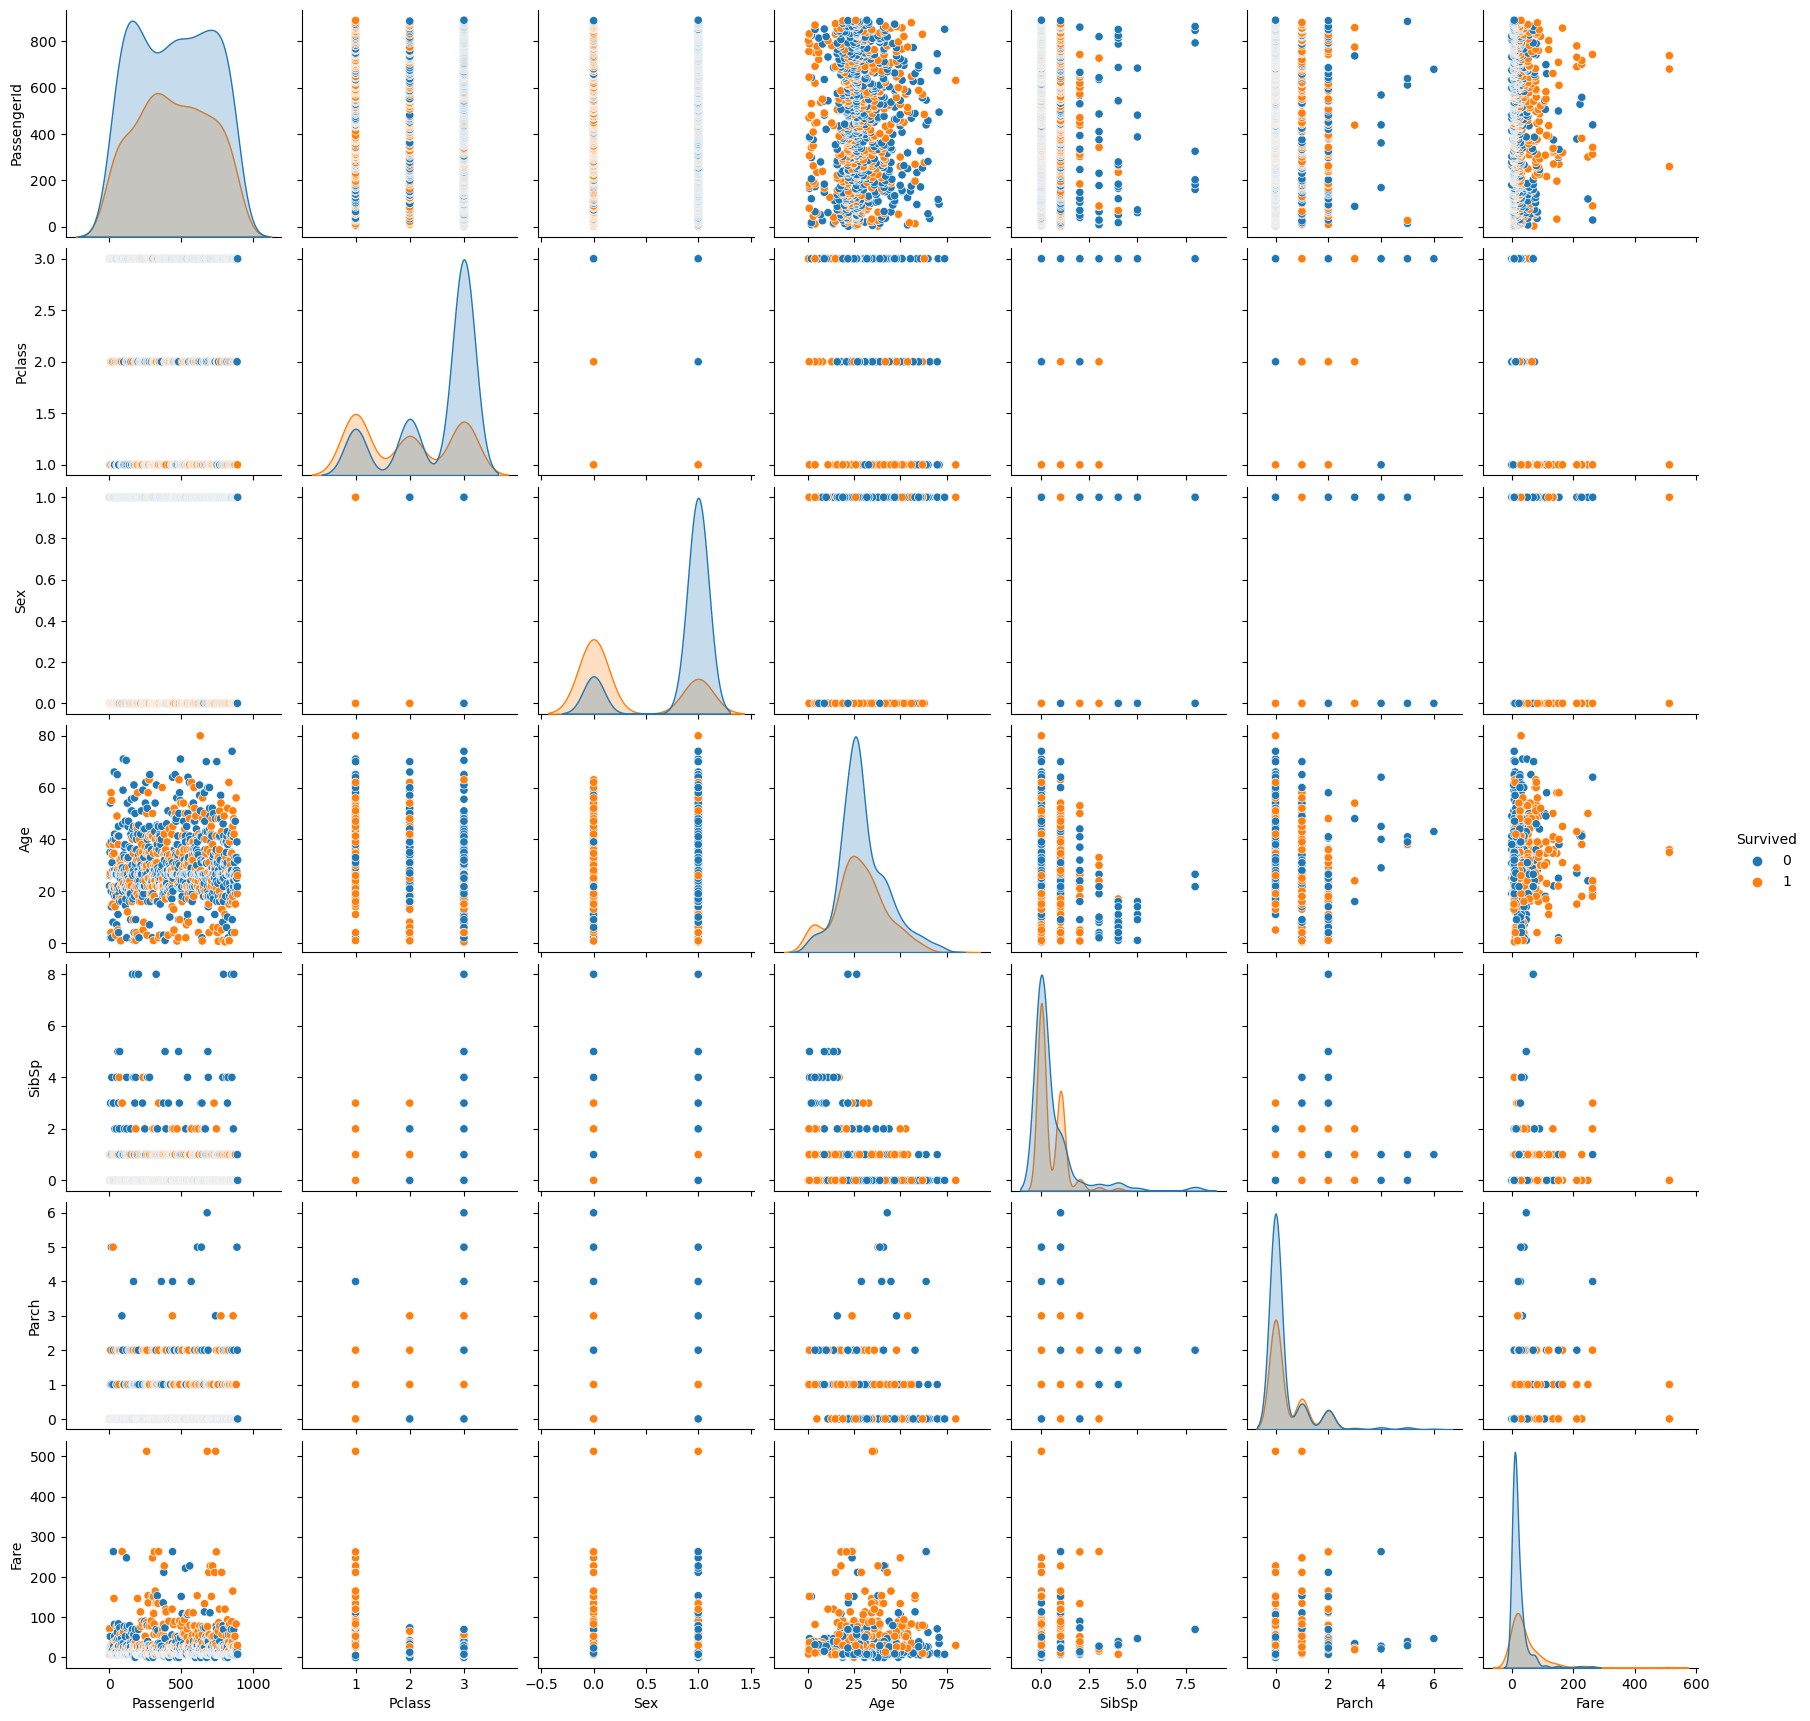

In [12]:
sns.pairplot(data=df,
                 hue='Survived')

In [13]:
sns.displot(data=df, x="Age", kde=True, color='red', linewidth=2.5)


In [14]:
df1=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [15]:
#df=df.drop(['PassengerId','Ticket'],axis=1)
Title_Dictionary ={ "Title": {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }}

df.replace(Title_Dictionary,inplace=True)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.75,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.0000,C


In [16]:
replace_sex={'Survived':{'No':0,'Yes':1}}
df.replace(replace_sex,inplace=True)


In [17]:
lr=LogisticRegression()
x=df.drop(['Survived','Name','Embarked'], axis=1) 
y=df['Survived']
x_train, x_test, y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:

lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print("Accuracy={:.2f}".format(lr.score(x_test, y_test)))

ValueError: could not convert string to float: 'STON/O 2. 3101293'

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_prd)
sns.heatmap(confusion_matrix, annot=True)